In [ ]:
from hyspexread import HySpex
# for plotting we use matplotlib
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
scan = HySpex(r'hsnr0_experiment_spectralon_VNIR_1800_SN00841_22998us_2020-02-06T173915_raw.hdr')

By default the indexes for accessing the interleaved is lines, bands and pixels. Hence for plotting the first band we have to use:

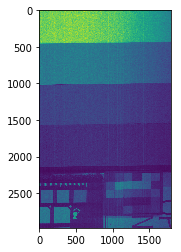

In [3]:
plt.imshow(scan.data[:,0,:])
plt.show()

We can swap the axes if we prefer to keep the bands on the third index:

In [4]:
data = scan.data.swapaxes(1,2)

In [5]:
data.shape

(2976, 1800, 186)

All the information of the binary and ASCII headers can be accessed using `self.binheader` and `self.txtheader`. I recomend to use test_headers function to check if there are any difference between the two. Usually in the binheader the wavelenght have a greater number of digits compared to spectral_callib and txtheader['wavelenght'].

In [6]:
scan.test_heders()

Differences bisides wavelength aproximation.
------------------------------------------
Field         |BinHeader     |TextHeader    
------------------------------------------
Lens          |20cm          |1             
Scanningmode  |none          |Ground        


({'HSNR',
  'byte order',
  'data ignore value',
  'data type',
  'interleave',
  'wavelength units',
  '}'},
 {'FOVexp',
  'NumberOfAvg',
  'SF',
  'backTemperature',
  'background_present',
  'backgroundfile',
  'bandwidth',
  'bias',
  'bitshift',
  'code',
  'comport',
  'comport_electronics',
  'comsetting_electronics',
  'comsettings',
  'configgile',
  'cooling_temperature',
  'current',
  'd',
  'default_B',
  'default_G',
  'default_R',
  'detected',
  'detectstring',
  'electronics',
  'empty_1',
  'empty_2',
  'empty_3',
  'fan_speed',
  'framegrabber',
  'header',
  'i',
  'left_gain',
  'max_framerate',
  'nobp',
  'p',
  'power',
  'readout_time',
  'recordHD',
  'right_gain',
  'scaling_factor',
  'sensor',
  'sensor_vin',
  'sensor_vref',
  'serverindex',
  'settingfile',
  'shutter',
  'supplier',
  'temperature',
  'temperature_offset',
  'vin',
  'vref',
  'window_start',
  'window_stop',
  'xcamera'})

For showing an RGB image we can used the default R,G,B bands of the header.

In [7]:
rgb = data[:,:,[scan.binheader["default_R"],scan.binheader["default_G"],scan.binheader["default_B"]]]

Before plotting we have to normalize to one the channels:

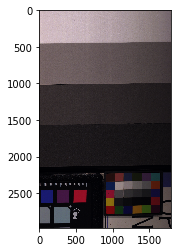

In [8]:
rgb_norm = rgb/np.max(rgb,axis=(0,1)).astype(np.float) # remember to converto to float otherwise int division will return 0.
plt.imshow(rgb_norm)

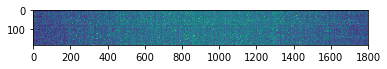

In [9]:
plt.imshow(scan.background)

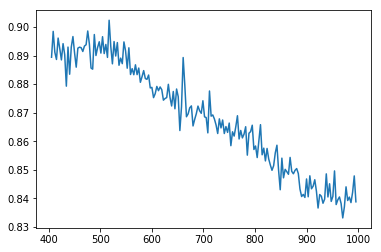

In [10]:
plt.plot(scan.spectral_calib, scan.QE)

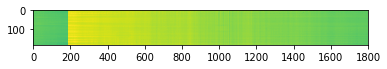

In [11]:
plt.imshow(scan.RE)

In [12]:
scan.spectral_calib
scan.binheader['wavelength']

array('d', [405.36988793035016, 408.56155271240686, 411.7532174944635, 414.9448822765202, 418.1365470585769, 421.3282118406336, 424.5198766226903, 427.711541404747, 430.9032061868037, 434.0948709688604, 437.2865357509171, 440.4782005329738, 443.66986531503045, 446.86153009708715, 450.05319487914386, 453.24485966120056, 456.4365244432572, 459.6281892253139, 462.8198540073706, 466.0115187894273, 469.20318357148403, 472.3948483535407, 475.5865131355974, 478.7781779176541, 481.9698426997108, 485.16150748176744, 488.35317226382415, 491.54483704588085, 494.73650182793756, 497.92816660999426, 501.11983139205097, 504.3114961741076, 507.5031609561643, 510.694825738221, 513.8864905202777, 517.0781553023344, 520.2698200843911, 523.4614848664478, 526.6531496485045, 529.8448144305612, 533.0364792126179, 536.2281439946746, 539.4198087767313, 542.6114735587879, 545.8031383408446, 548.9948031229013, 552.186467904958, 555.3781326870147, 558.5697974690714, 561.7614622511281, 564.9531270331847, 568.14479

In [13]:
scan.spectral_calib

array([ 405.36988793,  408.56155271,  411.75321749,  414.94488228,
        418.13654706,  421.32821184,  424.51987662,  427.7115414 ,
        430.90320619,  434.09487097,  437.28653575,  440.47820053,
        443.66986532,  446.8615301 ,  450.05319488,  453.24485966,
        456.43652444,  459.62818923,  462.81985401,  466.01151879,
        469.20318357,  472.39484835,  475.58651314,  478.77817792,
        481.9698427 ,  485.16150748,  488.35317226,  491.54483705,
        494.73650183,  497.92816661,  501.11983139,  504.31149617,
        507.50316096,  510.69482574,  513.88649052,  517.0781553 ,
        520.26982008,  523.46148487,  526.65314965,  529.84481443,
        533.03647921,  536.22814399,  539.41980878,  542.61147356,
        545.80313834,  548.99480312,  552.1864679 ,  555.37813269,
        558.56979747,  561.76146225,  564.95312703,  568.14479182,
        571.3364566 ,  574.52812138,  577.71978616,  580.91145094,
        584.10311573,  587.29478051,  590.48644529,  593.67811